In [1079]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
student_performance = fetch_ucirepo(id=320) 
  
# data (as pandas dataframes) 
X = student_performance.data.features 
y = student_performance.data.targets 
  
# metadata 
print(student_performance.metadata) 
  
# variable information 
print(student_performance.variables) 


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'published_in': 'Proceedings of 5th Annual Future Business Technology Conference', 'year'

In [1080]:
print(X.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1      3        4  
1    yes      yes        no       5         3     3    1    1      3        2  
2    yes      yes        no       4         3     2    2    3      3        6  
3    yes      yes       yes       3         2     2    1    1      5        0  
4    yes       no        no       4         3     2    1    2      5        0  

[5 rows x 30 columns]


In [1081]:
print(y.head())

   G1  G2  G3
0   0  11  11
1   9  11  11
2  12  13  12
3  14  14  14
4  11  13  13


In [1082]:
print(y.columns)

Index(['G1', 'G2', 'G3'], dtype='object')


Mean Squared Error: 9.729621677057027


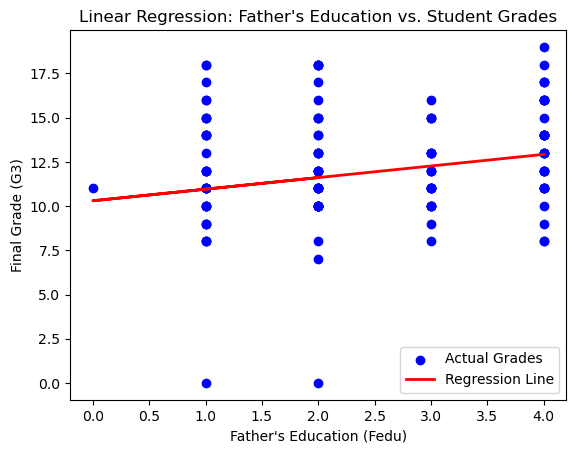

In [1083]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'X' is the feature matrix and 'y' is the DataFrame with target variable 'G3'
grades_and_fathers_education = pd.concat([X['Fedu'], y['G3']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(grades_and_fathers_education[['Fedu']], grades_and_fathers_education['G3'], test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Grades')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Father's Education (Fedu)")
plt.ylabel('Final Grade (G3)')
plt.title('Linear Regression: Father\'s Education vs. Student Grades')
plt.legend()
plt.show()


In [1084]:
import statsmodels.api as sm

# Add a constant term to the predictor variable
X_train = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Print the summary to see p-values and other statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.98
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           4.84e-07
Time:                        21:45:39   Log-Likelihood:                -1334.5
No. Observations:                 519   AIC:                             2673.
Df Residuals:                     517   BIC:                             2682.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3005      0.324     31.757      0.0

Mean Squared Error: 6.640367572191008


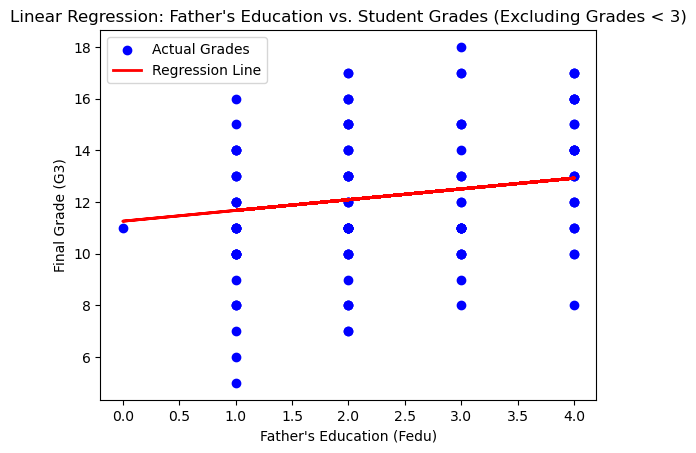

In [1085]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'X' is the feature matrix and 'y' is the DataFrame with target variable 'G3'
grades_and_fathers_education = pd.concat([X['Fedu'], y['G3']], axis=1)

# Exclude grades lower than 3
grades_and_fathers_education_filtered = grades_and_fathers_education[grades_and_fathers_education['G3'] >= 3]

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(grades_and_fathers_education_filtered[['Fedu']], grades_and_fathers_education_filtered['G3'], test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Grades')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Father's Education (Fedu)")
plt.ylabel('Final Grade (G3)')
plt.title('Linear Regression: Father\'s Education vs. Student Grades (Excluding Grades < 3)')
plt.legend()
plt.show()


Mean Squared Error: 6.994449704743557


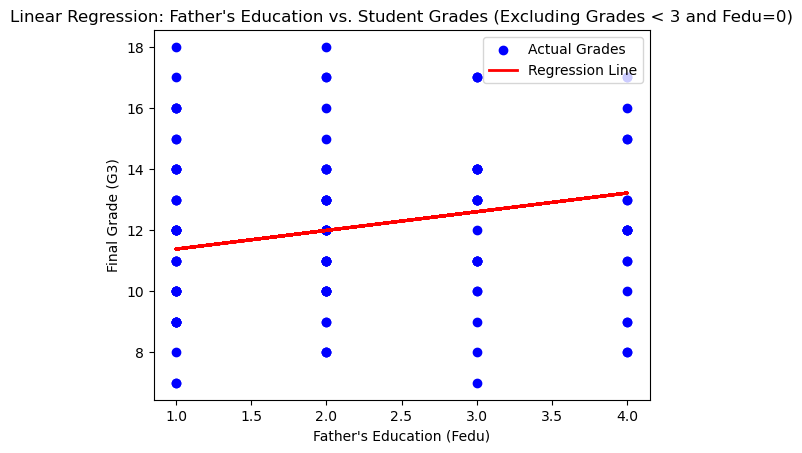

In [1086]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'X' is the feature matrix and 'y' is the DataFrame with the target variable 'G3'
grades_and_fathers_education = pd.concat([X['Fedu'], y['G3']], axis=1)

# Exclude grades lower than 3 and the 0 value for "Fedu"
grades_and_fathers_education_filtered = grades_and_fathers_education[(grades_and_fathers_education['G3'] >= 3) & (grades_and_fathers_education['Fedu'] > 0)]

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(grades_and_fathers_education_filtered[['Fedu']], grades_and_fathers_education_filtered['G3'], test_size=0.2, random_state=30)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Grades')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Father's Education (Fedu)")
plt.ylabel('Final Grade (G3)')
plt.title('Linear Regression: Father\'s Education vs. Student Grades (Excluding Grades < 3 and Fedu=0)')
plt.legend()
plt.show()


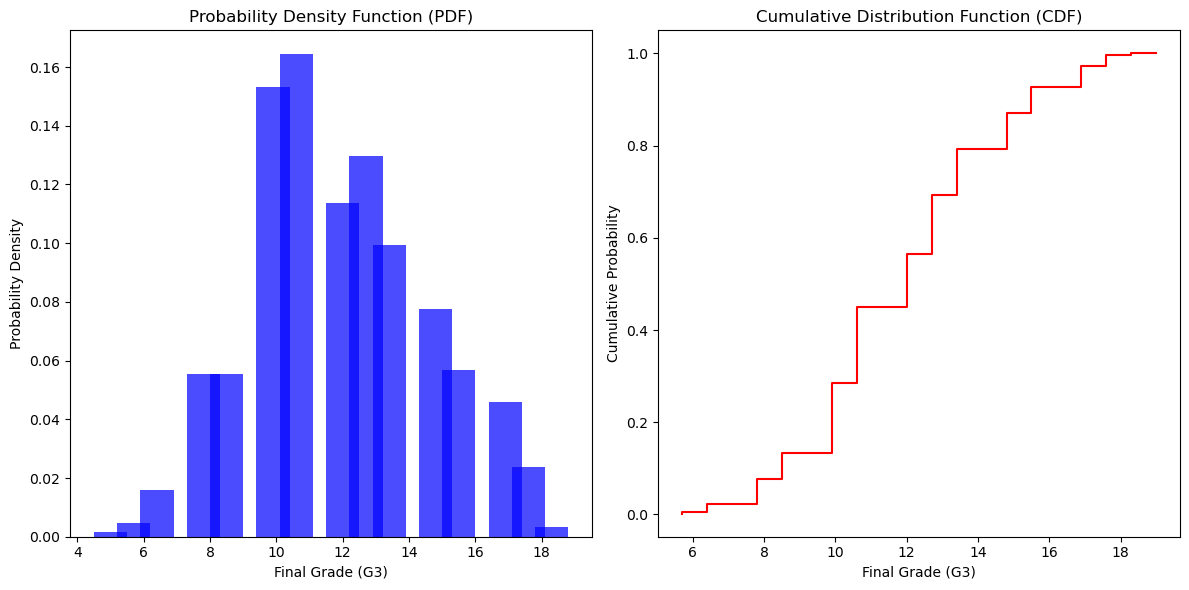

In [1087]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cumfreq
from scipy.stats import norm

# Assuming 'grades' is your data containing final grades (G3)

# Remove grades lower than 3
filtered_grades = grades[grades >= 3]

# Create a histogram to approximate the PDF
hist, bin_edges = np.histogram(filtered_grades, bins=20, density=True)

# Calculate PDF using the histogram
pdf = hist / sum(hist)

# Calculate CDF using cumsum
cdf = np.cumsum(pdf)

# Plotting PDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], pdf, width=1, alpha=0.7, color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Probability Density')

# Plotting CDF
plt.subplot(1, 2, 2)
plt.step(bin_edges[1:], cdf, color='red')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()


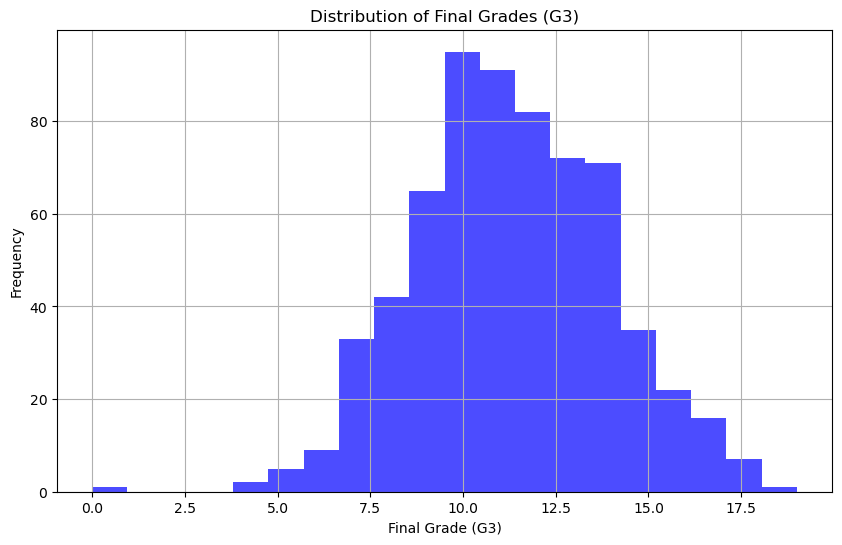

In [1088]:
import matplotlib.pyplot as plt

# Assuming 'y' is the target variable 'G3'
grades = y['G1']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(grades, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


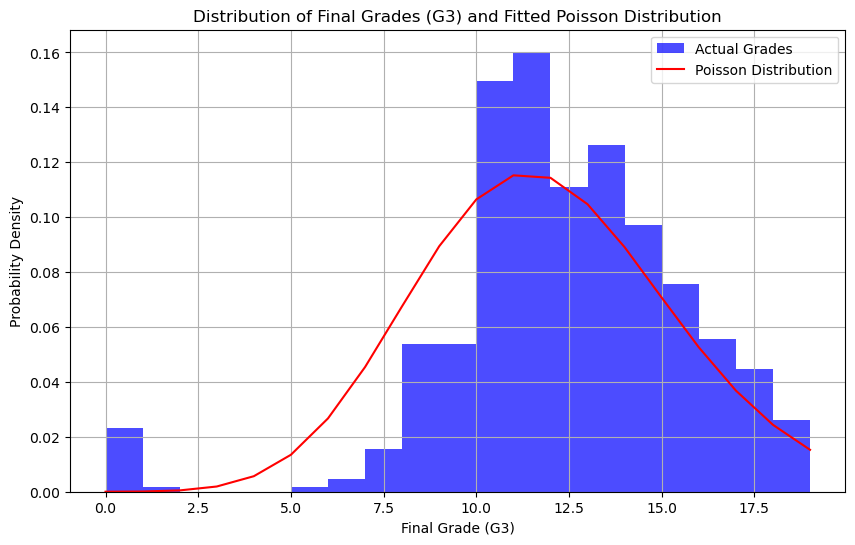

In [1089]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Assuming 'y' is the target variable 'G3'
grades = y['G3']

# Calculate the mean of the grades
mean_grade = grades.mean()

# Create a Poisson distribution with the mean of the grades
poisson_dist = poisson(mu=mean_grade)

# Generate values for the Poisson distribution
poisson_values = np.arange(grades.min(), grades.max() + 1)

# Plotting the actual grade distribution
plt.figure(figsize=(10, 6))
plt.hist(grades, bins=np.arange(grades.min(), grades.max() + 1), density=True, color='blue', alpha=0.7, label='Actual Grades')

# Plotting the fitted Poisson distribution
plt.plot(poisson_values, poisson_dist.pmf(poisson_values), 'r-', label='Poisson Distribution')

plt.title('Distribution of Final Grades (G3) and Fitted Poisson Distribution')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


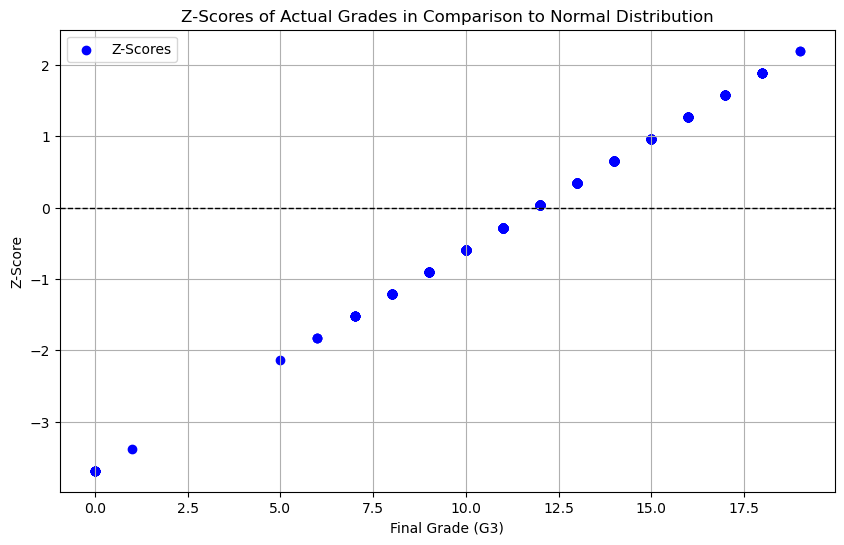

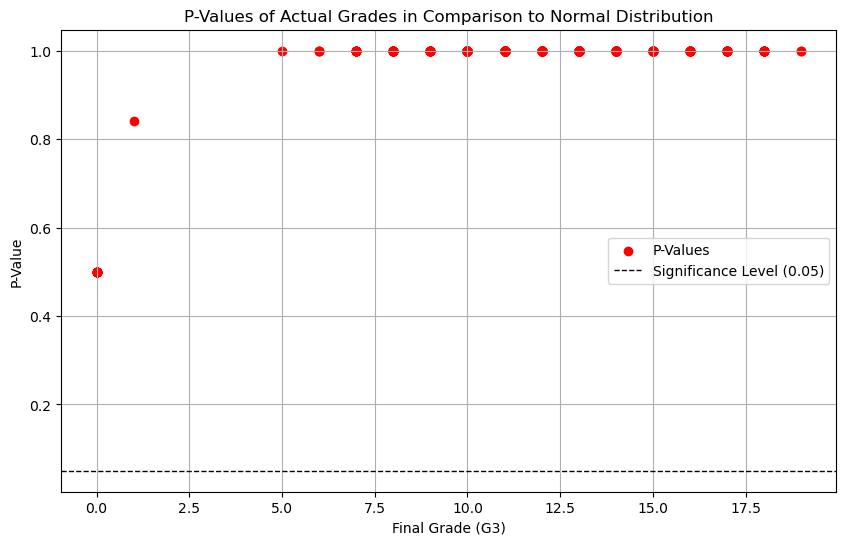

In [1090]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm

# Assuming 'y' is the target variable 'G3'
grades = y['G3']

# Generate z-scores for the actual grades
z_scores = zscore(grades)

# Calculate p-values using the cumulative distribution function (CDF) of the standard normal distribution
p_values = norm.cdf(grades)

# Plotting the z-scores
plt.figure(figsize=(10, 6))
plt.scatter(grades, z_scores, color='blue', label='Z-Scores')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Z-Scores of Actual Grades in Comparison to Normal Distribution')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the p-values
plt.figure(figsize=(10, 6))
plt.scatter(grades, p_values, color='red', label='P-Values')
plt.axhline(0.05, color='black', linestyle='--', linewidth=1, label='Significance Level (0.05)')
plt.title('P-Values of Actual Grades in Comparison to Normal Distribution')
plt.xlabel('Final Grade (G3)')
plt.ylabel('P-Value')
plt.legend()
plt.grid(True)
plt.show()


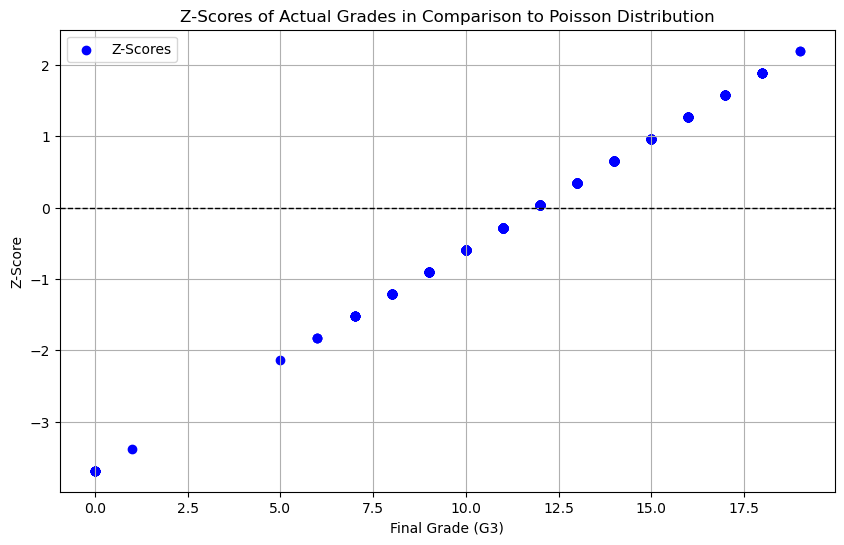

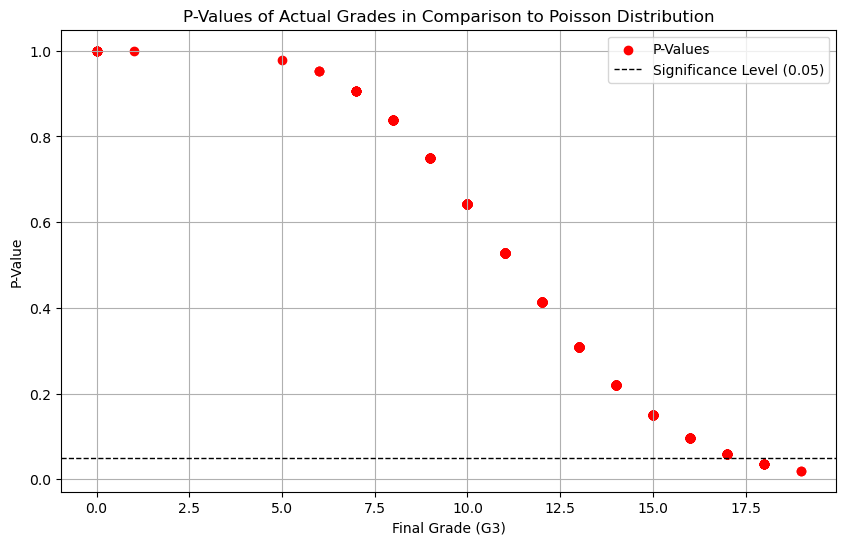

In [1091]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, zscore

# Assuming 'y' is the target variable 'G3'
grades = y['G3']

# Calculate the mean of the grades
mean_grade = grades.mean()

# Create a Poisson distribution with the mean of the grades
poisson_dist = poisson(mu=mean_grade)

# Generate z-scores for the actual grades
z_scores = zscore(grades)

# Calculate p-values using the survival function (1 - cumulative distribution function) of the Poisson distribution
p_values = poisson_dist.sf(grades)

# Plotting the z-scores
plt.figure(figsize=(10, 6))
plt.scatter(grades, z_scores, color='blue', label='Z-Scores')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Z-Scores of Actual Grades in Comparison to Poisson Distribution')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the p-values
plt.figure(figsize=(10, 6))
plt.scatter(grades, p_values, color='red', label='P-Values')
plt.axhline(0.05, color='black', linestyle='--', linewidth=1, label='Significance Level (0.05)')
plt.title('P-Values of Actual Grades in Comparison to Poisson Distribution')
plt.xlabel('Final Grade (G3)')
plt.ylabel('P-Value')
plt.legend()
plt.grid(True)
plt.show()


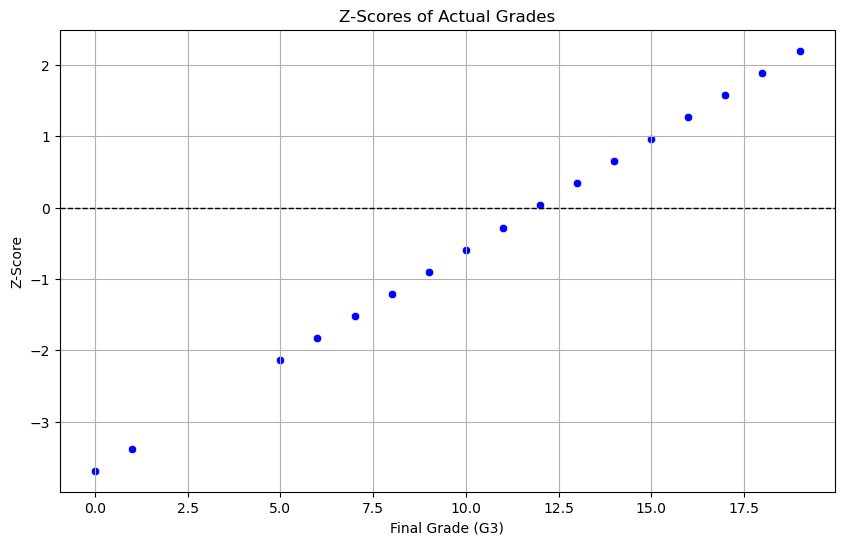

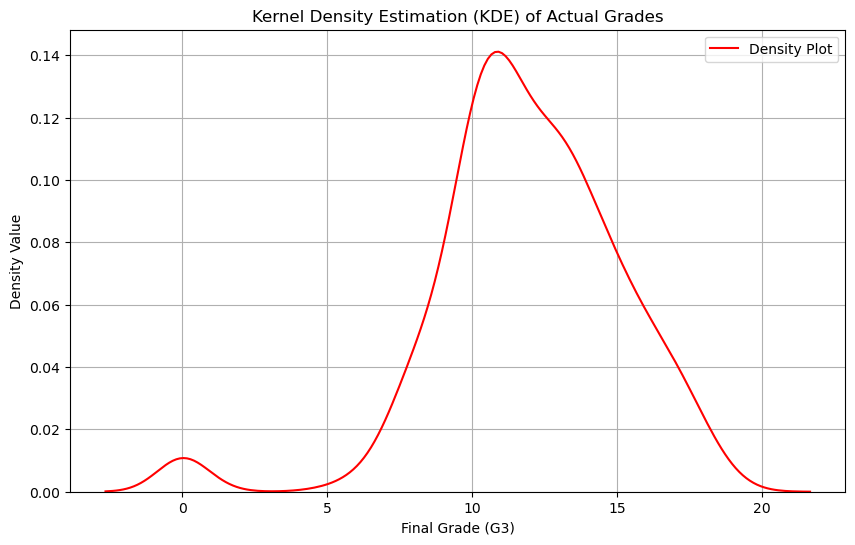

In [1092]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y' is the target variable 'G3'
grades = y['G3']

# Generate z-scores for the actual grades
z_scores = zscore(grades)

# Plotting the z-scores using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=grades, y=z_scores, color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Z-Scores of Actual Grades')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Z-Score')
plt.grid(True)
plt.show()

# Plotting the KDE plot for the actual grades
plt.figure(figsize=(10, 6))
sns.kdeplot(grades, color='red', label='Density Plot')
plt.title('Kernel Density Estimation (KDE) of Actual Grades')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Density Value')
plt.legend()
plt.grid(True)
plt.show()


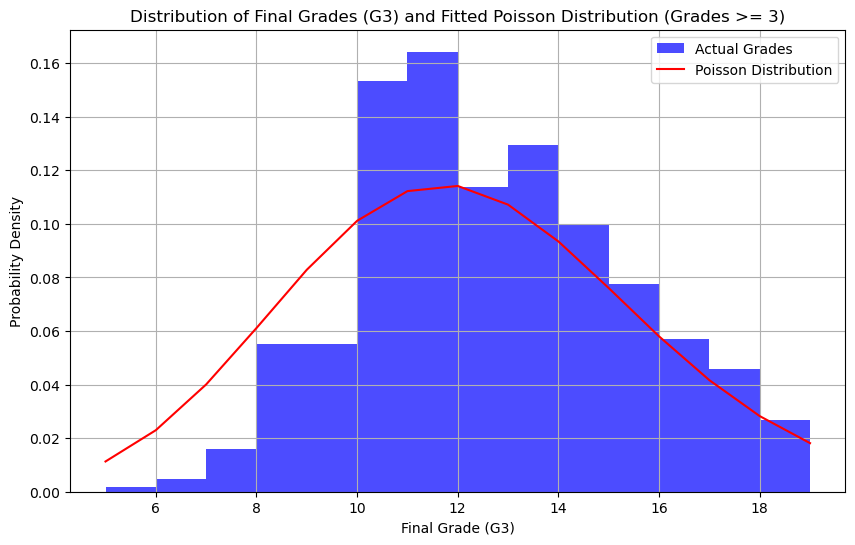

In [1093]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Assuming 'y' is the target variable 'G3'
grades = y['G3']

# Omit grades less than 3
filtered_grades = grades[grades >= 3]

# Calculate the mean of the filtered grades
mean_grade = filtered_grades.mean()

# Create a Poisson distribution with the mean of the filtered grades
poisson_dist = poisson(mu=mean_grade)

# Generate values for the Poisson distribution
poisson_values = np.arange(filtered_grades.min(), filtered_grades.max() + 1)

# Plotting the actual grade distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_grades, bins=np.arange(filtered_grades.min(), filtered_grades.max() + 1),
         density=True, color='blue', alpha=0.7, label='Actual Grades')

# Plotting the fitted Poisson distribution
plt.plot(poisson_values, poisson_dist.pmf(poisson_values), 'r-', label='Poisson Distribution')

plt.title('Distribution of Final Grades (G3) and Fitted Poisson Distribution (Grades >= 3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


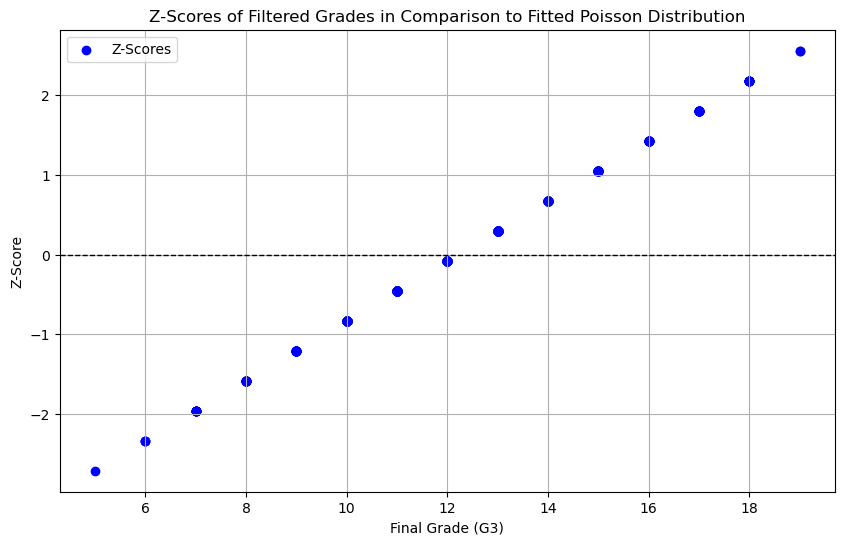

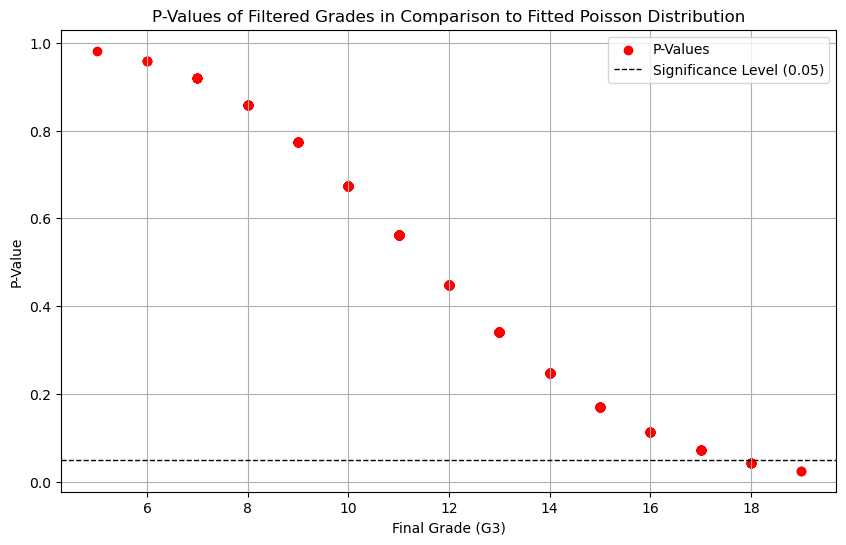

In [1094]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, poisson

# Assuming 'y' is the target variable 'G3'
grades = y['G3']

# Omit grades less than 3
filtered_grades = grades[grades >= 3]

# Calculate the mean of the filtered grades
mean_grade = filtered_grades.mean()

# Create a Poisson distribution with the mean of the filtered grades
poisson_dist = poisson(mu=mean_grade)

# Generate z-scores for the filtered grades
z_scores = zscore(filtered_grades)

# Calculate p-values using the survival function (1 - cumulative distribution function) of the Poisson distribution
p_values = poisson_dist.sf(filtered_grades)

# Plotting the z-scores
plt.figure(figsize=(10, 6))
plt.scatter(filtered_grades, z_scores, color='blue', label='Z-Scores')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Z-Scores of Filtered Grades in Comparison to Fitted Poisson Distribution')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Z-Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the p-values
plt.figure(figsize=(10, 6))
plt.scatter(filtered_grades, p_values, color='red', label='P-Values')
plt.axhline(0.05, color='black', linestyle='--', linewidth=1, label='Significance Level (0.05)')
plt.title('P-Values of Filtered Grades in Comparison to Fitted Poisson Distribution')
plt.xlabel('Final Grade (G3)')
plt.ylabel('P-Value')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 8.189784412019225


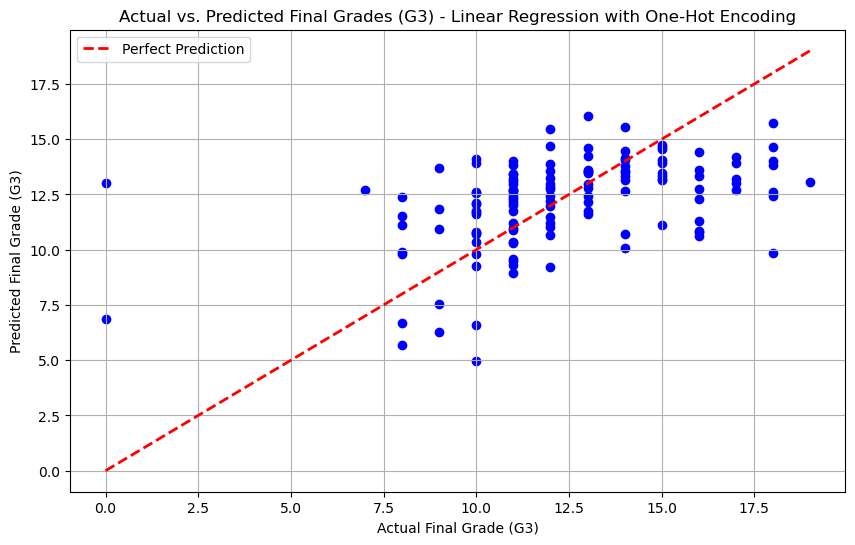

In [1095]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
X = student_performance.data.features
y = student_performance.data.targets['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Create and fit a linear regression model with the preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Final Grades (G3) - Linear Regression with One-Hot Encoding')
plt.xlabel('Actual Final Grade (G3)')
plt.ylabel('Predicted Final Grade (G3)')
plt.legend()
plt.grid(True)
plt.show()



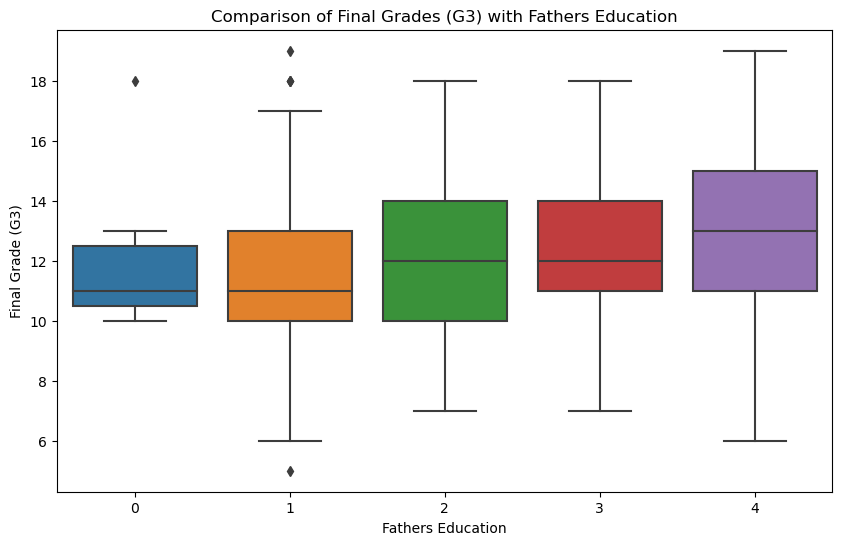

In [1096]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
# Famsize is part of 'X', so you can extract it and combine with 'y'
grades_and_family_size = pd.concat([X['Fedu'], y], axis=1)

filtered_data = grades_and_family_size[grades_and_family_size['G3'] >= 3]

# Plot a box plot or violin plot to compare grades with family size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fedu', y='G3', data=filtered_data)
plt.title('Comparison of Final Grades (G3) with Fathers Education')
plt.xlabel('Fathers Education')
plt.ylabel('Final Grade (G3)')
plt.show()


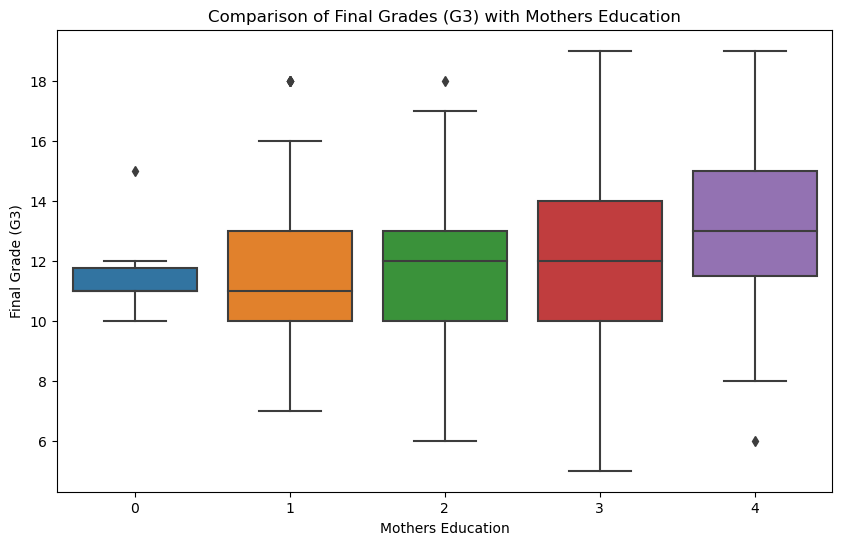

In [1097]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
# Famsize is part of 'X', so you can extract it and combine with 'y'
grades_and_family_size = pd.concat([X['Medu'], y], axis=1)

filtered_data = grades_and_family_size[grades_and_family_size['G3'] >= 3]

# Plot a box plot or violin plot to compare grades with family size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Medu', y='G3', data=filtered_data)
plt.title('Comparison of Final Grades (G3) with Mothers Education')
plt.xlabel('Mothers Education')
plt.ylabel('Final Grade (G3)')
plt.show()

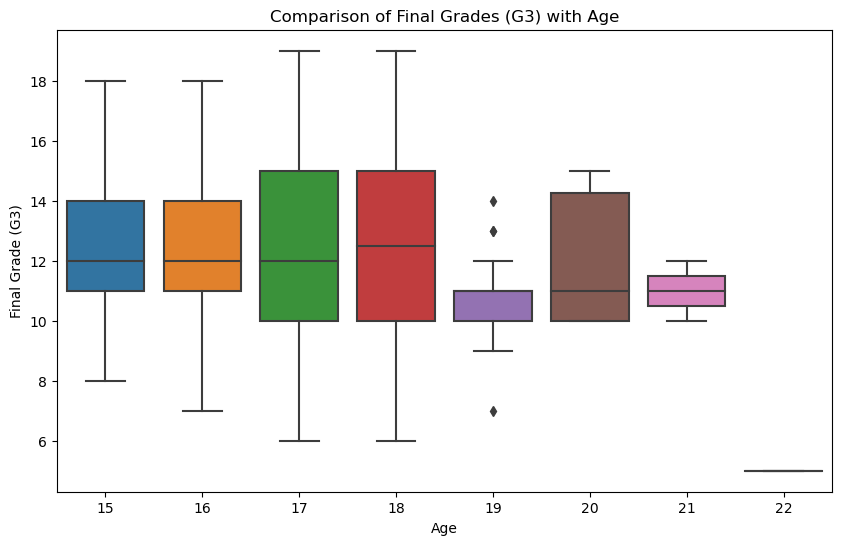

In [1098]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
# Famsize is part of 'X', so you can extract it and combine with 'y'
grades_and_family_size = pd.concat([X['age'], y], axis=1)

filtered_data = grades_and_family_size[grades_and_family_size['G3'] >= 3]

# Plot a box plot or violin plot to compare grades with family size
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='G3', data=filtered_data)
plt.title('Comparison of Final Grades (G3) with Age')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.show()

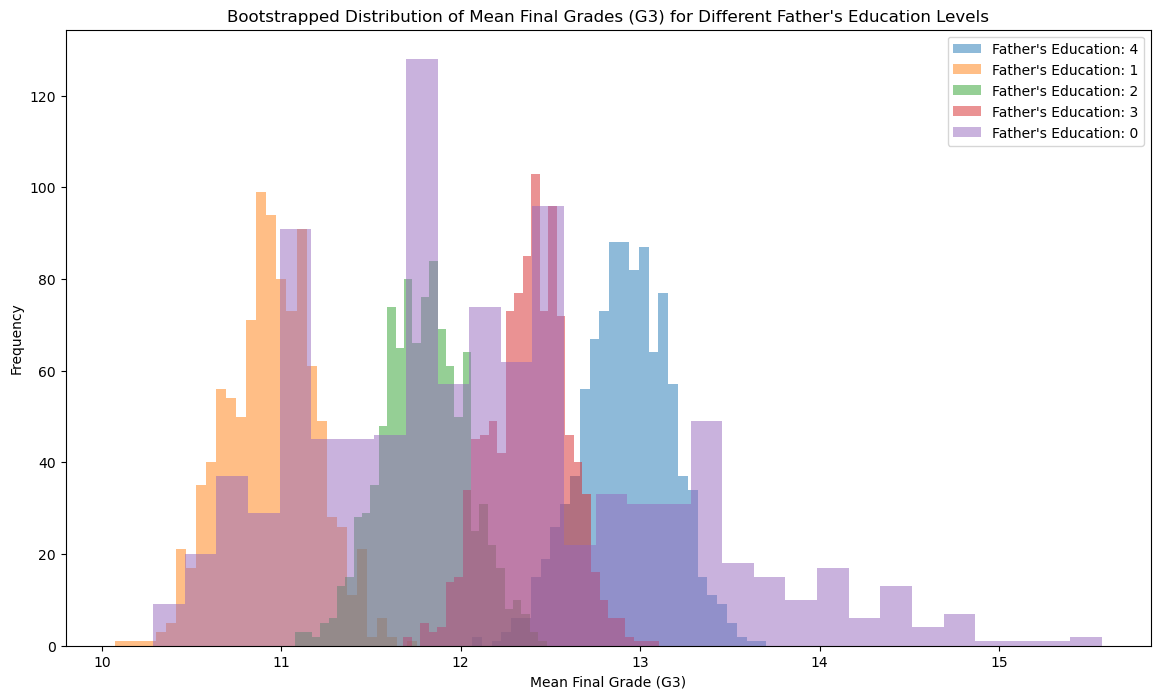

In [1099]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
grades_and_fathers_education = pd.concat([X['Fedu'], y], axis=1)

# Function to calculate mean final grades for a bootstrap sample
def bootstrap_mean(sample):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    return np.mean(bootstrap_sample)

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Initialize an empty list to store bootstrap means
bootstrap_means_by_fedu = []

# Iterate over unique values of 'Fedu'
for edu_level in grades_and_fathers_education['Fedu'].unique():
    bootstrap_means = [bootstrap_mean(grades_and_fathers_education[grades_and_fathers_education['Fedu'] == edu_level]['G3'].values) for _ in range(num_bootstrap_samples)]
    bootstrap_means_by_fedu.append((edu_level, bootstrap_means))

# Plot the distribution of bootstrap means for each father's education level
plt.figure(figsize=(14, 8))
for edu_level, bootstrap_means in bootstrap_means_by_fedu:
    plt.hist(bootstrap_means, bins=30, alpha=0.5, label=f"Father's Education: {edu_level}")

plt.title('Bootstrapped Distribution of Mean Final Grades (G3) for Different Father\'s Education Levels')
plt.xlabel('Mean Final Grade (G3)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



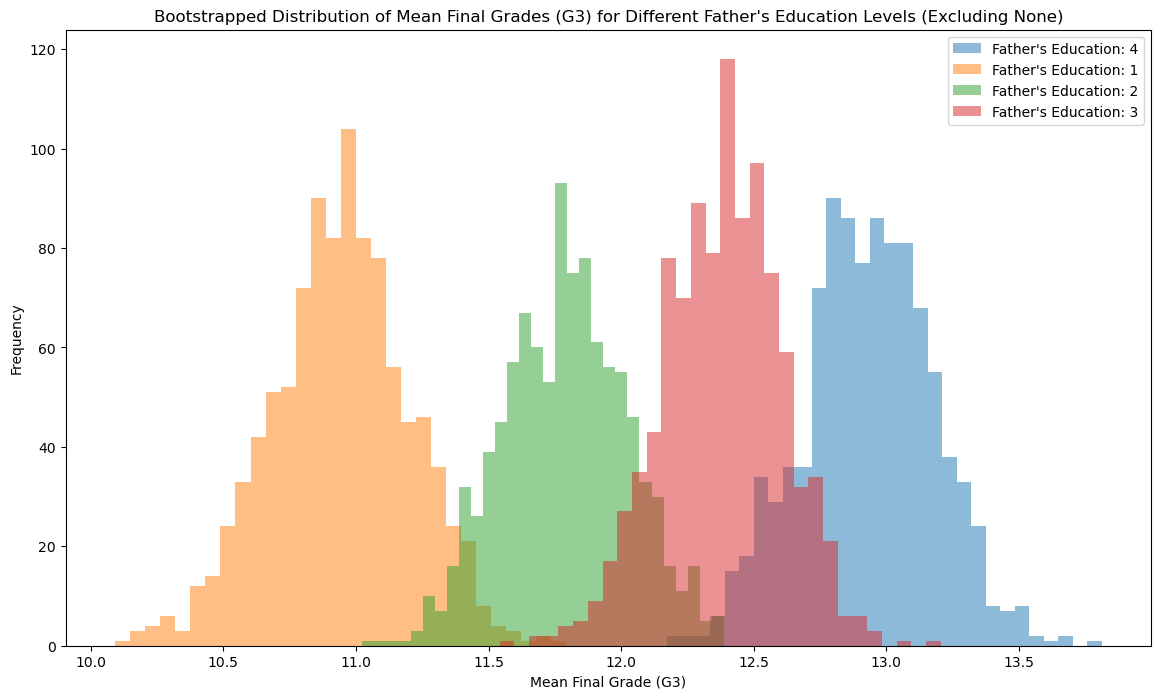

In [1100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
grades_and_fathers_education = pd.concat([X['Fedu'], y], axis=1)

# Function to calculate mean final grades for a bootstrap sample
def bootstrap_mean(sample):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    return np.mean(bootstrap_sample)

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Initialize an empty list to store bootstrap means
bootstrap_means_by_fedu = []

# Iterate over unique values of 'Fedu' excluding 0
for edu_level in grades_and_fathers_education['Fedu'].unique():
    if edu_level != 0:  # Exclude the value 0
        bootstrap_means = [bootstrap_mean(grades_and_fathers_education[grades_and_fathers_education['Fedu'] == edu_level]['G3'].values) for _ in range(num_bootstrap_samples)]
        bootstrap_means_by_fedu.append((edu_level, bootstrap_means))

# Plot the distribution of bootstrap means for each father's education level
plt.figure(figsize=(14, 8))
for edu_level, bootstrap_means in bootstrap_means_by_fedu:
    plt.hist(bootstrap_means, bins=30, alpha=0.5, label=f"Father's Education: {edu_level}")

plt.title("Bootstrapped Distribution of Mean Final Grades (G3) for Different Father's Education Levels (Excluding None)")
plt.xlabel('Mean Final Grade (G3)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



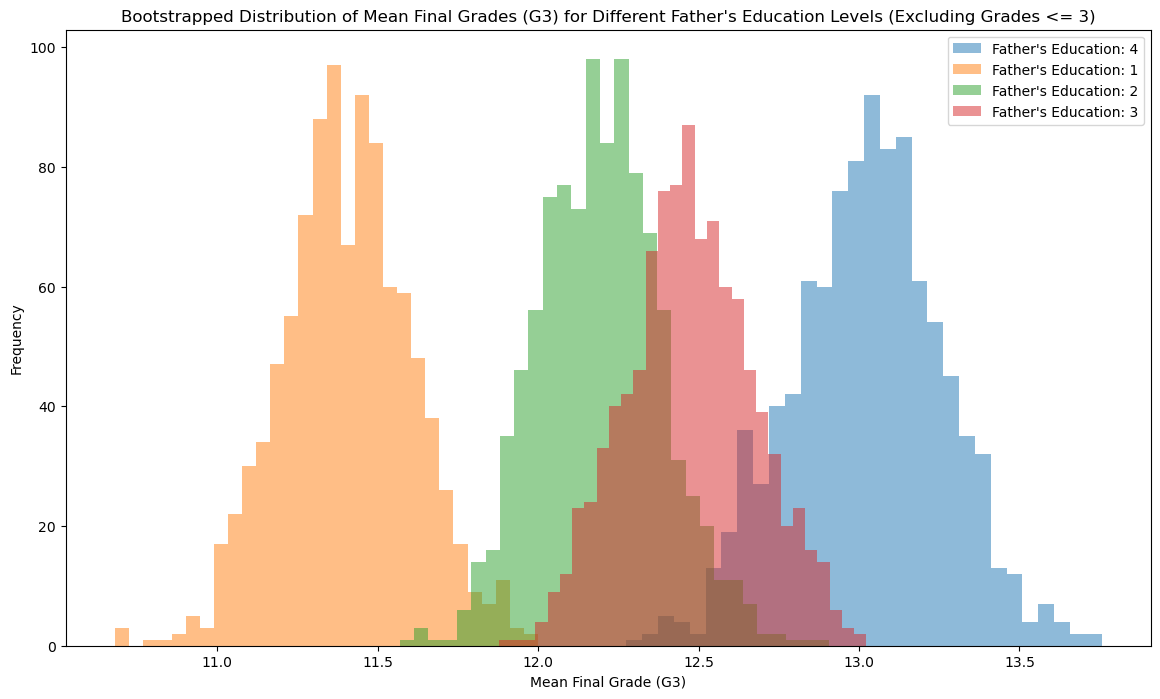

In [1101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
grades_and_fathers_education = pd.concat([X['Fedu'], y], axis=1)

# Function to calculate mean final grades for a bootstrap sample
def bootstrap_mean(sample):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    return np.mean(bootstrap_sample)

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Initialize an empty list to store bootstrap means
bootstrap_means_by_fedu = []

# Iterate over unique values of 'Fedu' excluding 0
for edu_level in grades_and_fathers_education['Fedu'].unique():
    if edu_level != 0:  # Exclude the value 0
        # Filter grades no greater than 3 for the current 'Fedu' level
        edu_level_grades = grades_and_fathers_education[(grades_and_fathers_education['Fedu'] == edu_level) & (grades_and_fathers_education['G3'] > 3)]['G3'].values
        bootstrap_means = [bootstrap_mean(edu_level_grades) for _ in range(num_bootstrap_samples)]
        bootstrap_means_by_fedu.append((edu_level, bootstrap_means))

# Plot the distribution of bootstrap means for each father's education level
plt.figure(figsize=(14, 8))
for edu_level, bootstrap_means in bootstrap_means_by_fedu:
    plt.hist(bootstrap_means, bins=30, alpha=0.5, label=f"Father's Education: {edu_level}")

plt.title("Bootstrapped Distribution of Mean Final Grades (G3) for Different Father's Education Levels (Excluding Grades <= 3)")
plt.xlabel('Mean Final Grade (G3)')
plt.ylabel('Frequency')
plt.legend()
plt.show()



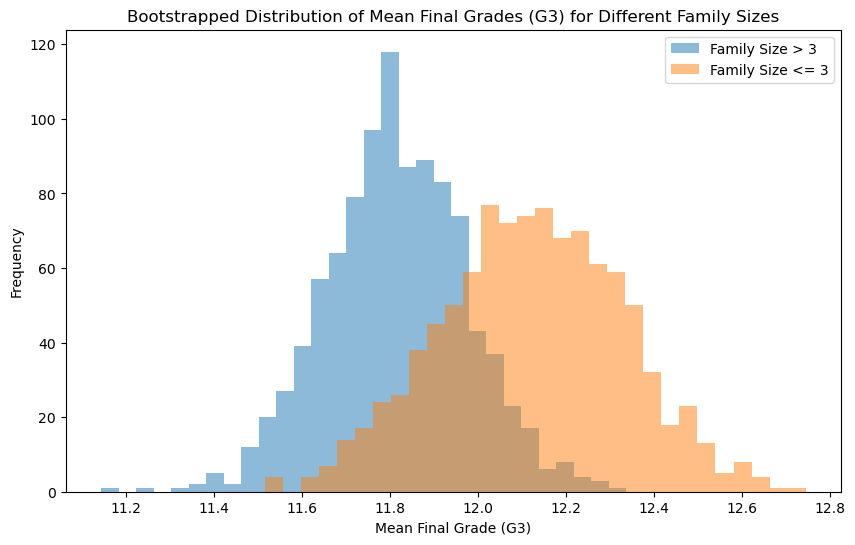

In [1102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
grades_and_family_size = pd.concat([X['famsize'], y], axis=1)

# Function to calculate mean final grades for a bootstrap sample
def bootstrap_mean(sample):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    return np.mean(bootstrap_sample)

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Bootstrap resampling for each family size category
bootstrap_means_gt3 = [bootstrap_mean(grades_and_family_size[grades_and_family_size['famsize'] == 'GT3']['G3'].values) for _ in range(num_bootstrap_samples)]
bootstrap_means_le3 = [bootstrap_mean(grades_and_family_size[grades_and_family_size['famsize'] == 'LE3']['G3'].values) for _ in range(num_bootstrap_samples)]

# Plot the distribution of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means_gt3, bins=30, alpha=0.5, label='Family Size > 3')
plt.hist(bootstrap_means_le3, bins=30, alpha=0.5, label='Family Size <= 3')
plt.title('Bootstrapped Distribution of Mean Final Grades (G3) for Different Family Sizes')
plt.xlabel('Mean Final Grade (G3)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


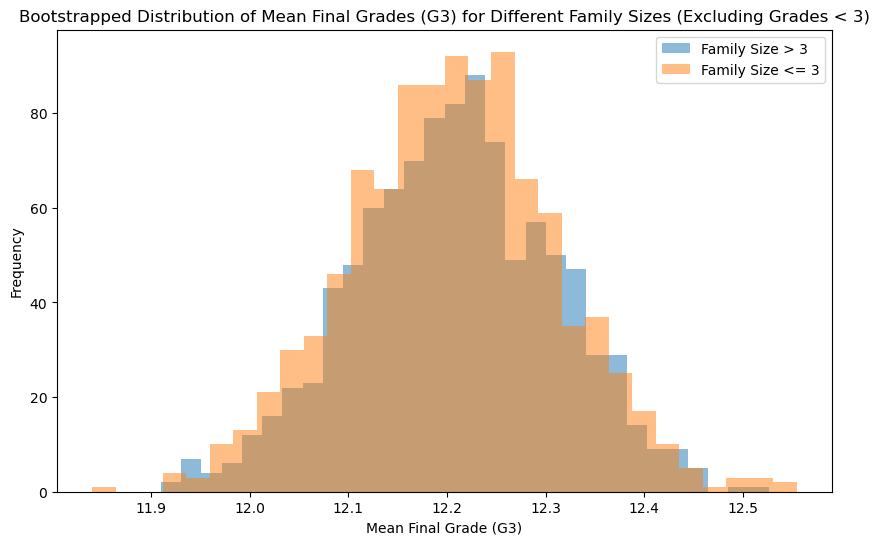

In [1103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'
grades_and_family_size = pd.concat([X['famsize'], y], axis=1)

# Function to calculate mean final grades for a bootstrap sample
def bootstrap_mean(sample):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    return np.mean(bootstrap_sample)

# Number of bootstrap samples
num_bootstrap_samples = 1000

# Filter grades below 3
filtered_grades_gt3 = grades_and_family_size[grades_and_family_size['G3'] >= 3]['G3'].values
filtered_grades_le3 = grades_and_family_size[grades_and_family_size['G3'] >= 3]['G3'].values

# Bootstrap resampling for each family size category
bootstrap_means_gt3 = [bootstrap_mean(filtered_grades_gt3) for _ in range(num_bootstrap_samples)]
bootstrap_means_le3 = [bootstrap_mean(filtered_grades_le3) for _ in range(num_bootstrap_samples)]

# Plot the distribution of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means_gt3, bins=30, alpha=0.5, label='Family Size > 3')
plt.hist(bootstrap_means_le3, bins=30, alpha=0.5, label='Family Size <= 3')
plt.title('Bootstrapped Distribution of Mean Final Grades (G3) for Different Family Sizes (Excluding Grades < 3)')
plt.xlabel('Mean Final Grade (G3)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [1104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'y' is the target variable 'G3'
grades_and_fathers_education = pd.concat([X['Fedu'], y['G3']], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(grades_and_fathers_education[['Fedu']], grades_and_fathers_education['G3'], test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Grades')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Father's Education (Fedu)")
plt.ylabel('Final Grade (G3)')
plt.title('Linear Regression: Father\'s Education vs. Student Grades')
plt.legend()
plt.show()


KeyError: 'G3'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'X' is the feature matrix and 'y' is the target variable 'G3'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


ValueError: could not convert string to float: 'GP'

In [ ]:
print(y.columns)

AttributeError: 'Series' object has no attribute 'columns'